# Linear Regression  - Age vs Minutes Played

## Setup

In [1]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import statsmodels.formula.api as smf

notebook_dir = os.getcwd()
os.chdir('../..')

## Data

In [2]:
num_observations = 20
la_liga_df = pd.read_csv("data\la_liga_playerstats.csv")

minutes_model = pd.DataFrame()
minutes_model["Min"] = la_liga_df.iloc[0:num_observations]["Min"].astype("float64")
minutes_model["Age"] = la_liga_df.iloc[0:num_observations]["Age"]

minutes_model

,Min,Age
0,560.0,25.0
1,2260.0,29.0
2,1616.0,25.0
3,360.0,20.0
4,151.0,33.0
5,9.0,21.0
6,2637.0,25.0
7,1844.0,28.0
8,124.0,17.0
9,516.0,23.0


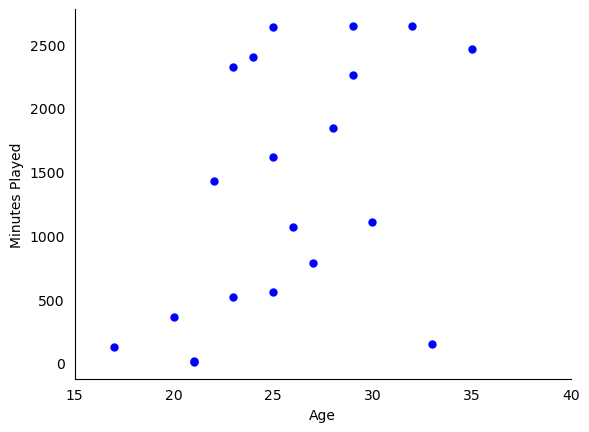

In [3]:
fig,ax = plt.subplots(num=1)
ax.plot(minutes_model["Age"], minutes_model["Min"], linestyle='none', marker= '.', markersize= 10, color='blue')
ax.set_ylabel("Minutes Played")
ax.set_xlabel("Age")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.tick_params(bottom=False, left=False)
plt.xlim(15, 40);

## First Model

In [63]:
model_fit = smf.ols(formula="Min ~ Age", data=minutes_model).fit()
print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    Min   R-squared:                       0.231
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     5.415
Date:                Sun, 24 Dec 2023   Prob (F-statistic):             0.0318
Time:                        16:37:47   Log-Likelihood:                -163.24
No. Observations:                  20   AIC:                             330.5
Df Residuals:                      18   BIC:                             332.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1293.0147   1152.158     -1.122      0.2

### Plotting 

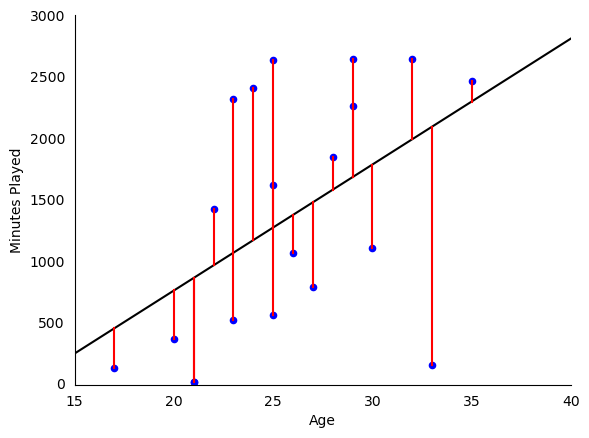

In [64]:
fig, ax = plt.subplots(1)

# Model Line
xs =  np.linspace(0,40,100)
ys = model_fit.predict({"Age" : xs})

# Drawing from points to model line
predictions_to_minutes = pd.DataFrame()
predictions_to_minutes["Min"] = minutes_model["Min"]
predictions_to_minutes["Age"] = minutes_model["Age"]
predictions_to_minutes["Prediction"] = model_fit.predict({"Age" : minutes_model["Age"]})

minutes_model.plot.scatter(x="Age", y="Min", color="Blue", ax=ax)

ax.set_ylabel("Minutes Played")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.plot(xs, ys, c="black")

plt.tick_params(bottom=False, left=False)
plt.xlim(15, 40)
plt.ylim(-10,3000)

for i,a in enumerate(predictions_to_minutes['Age']):
     ax.plot([a,a], [predictions_to_minutes['Min'][i], predictions_to_minutes["Prediction"][i]], color='red')
plt.show();

### Model with a Quadratic Term

In [65]:
minutes_model["Age_squared"] = minutes_model["Age"] ** 2
model_fit = smf.ols(formula="Min ~ Age + Age_squared", data=minutes_model).fit()
print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    Min   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     3.559
Date:                Sun, 24 Dec 2023   Prob (F-statistic):             0.0512
Time:                        16:38:04   Log-Likelihood:                -162.38
No. Observations:                  20   AIC:                             330.8
Df Residuals:                      17   BIC:                             333.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -8063.5823   5573.188     -1.447      

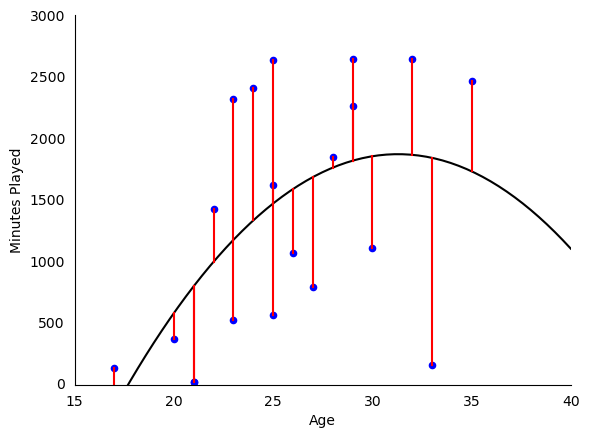

In [66]:
fig, ax = plt.subplots(1)

# Model Line
xs =  np.linspace(0,40,100)
ys = model_fit.predict({"Age" : xs, "Age_squared": xs **2})

# Drawing from points to model line
predictions_to_minutes = pd.DataFrame()
predictions_to_minutes["Min"] = minutes_model["Min"]
predictions_to_minutes["Age"] = minutes_model["Age"]
predictions_to_minutes["Age_squared"] = minutes_model["Age_squared"] 
predictions_to_minutes["Prediction"] = model_fit.predict({"Age" : minutes_model["Age"], "Age_squared" : minutes_model["Age_squared"]})

minutes_model.plot.scatter(x="Age", y="Min", color="Blue", ax=ax)

ax.set_ylabel("Minutes Played")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.plot(xs, ys, c="black")

plt.tick_params(bottom=False, left=False)
plt.xlim(15, 40)
plt.ylim(-10,3000)

for i,a in enumerate(predictions_to_minutes['Age']):
     ax.plot([a,a], [predictions_to_minutes['Min'][i], predictions_to_minutes["Prediction"][i]], color='red')
plt.show();

### Challenges
1. All Data Points
2. Include a Cubic Term
3. Think about and how useful the model is and it's limitations.

#### All Data Points

In [68]:
minutes_model_all_data = pd.DataFrame()
minutes_model_all_data["Min"] = la_liga_df["Min"].astype("float64")
minutes_model_all_data["Age"] = la_liga_df["Age"]

minutes_model_all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Min     617 non-null    float64
 1   Age     616 non-null    float64
dtypes: float64(2)
memory usage: 9.8 KB


In [69]:
minutes_model_all_data["Age_squared"] = minutes_model_all_data["Age"] ** 2
model_all_data_fit = smf.ols(formula="Min ~ Age + Age_squared", data=minutes_model_all_data).fit()
print(model_all_data_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    Min   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     51.35
Date:                Sun, 24 Dec 2023   Prob (F-statistic):           2.41e-21
Time:                        16:39:38   Log-Likelihood:                -5057.4
No. Observations:                 616   AIC:                         1.012e+04
Df Residuals:                     613   BIC:                         1.013e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -5255.8833    951.226     -5.525      

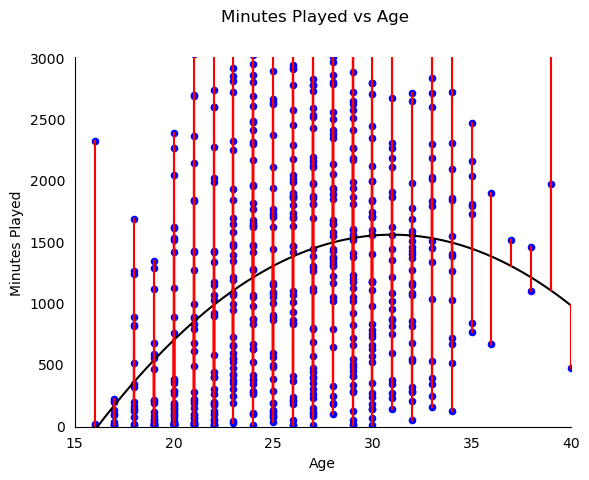

In [72]:
fig, ax = plt.subplots(1)

# Model Line
xs =  np.linspace(0,40,1000)
ys = model_all_data_fit.predict({"Age" : xs, "Age_squared": xs **2})

# Drawing from points to model line
predictions_to_minutes = pd.DataFrame()
predictions_to_minutes["Min"] = minutes_model_all_data["Min"]
predictions_to_minutes["Age"] = minutes_model_all_data["Age"]
predictions_to_minutes["Age_squared"] = minutes_model_all_data["Age_squared"] 
predictions_to_minutes["Prediction"] = model_all_data_fit.predict({"Age" : minutes_model_all_data["Age"], "Age_squared" : minutes_model_all_data["Age_squared"]})

minutes_model_all_data.plot.scatter(x="Age", y="Min", color="Blue", ax=ax)

ax.set_ylabel("Minutes Played")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.plot(xs, ys, c="black")

plt.tick_params(bottom=False, left=False)
plt.xlim(15, 40)
plt.ylim(-10,3000)

for i,a in enumerate(predictions_to_minutes['Age']):
     ax.plot([a,a], [predictions_to_minutes['Min'][i], predictions_to_minutes["Prediction"][i]], color='red')

fig.suptitle("Minutes Played vs Age")
plt.show();

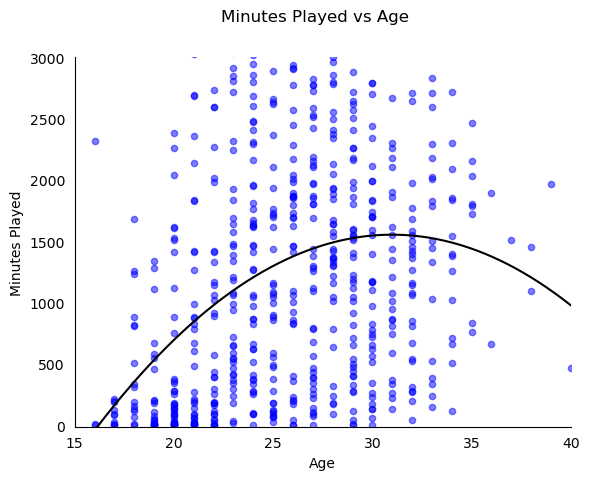

In [74]:
fig, ax = plt.subplots(1)

# Model Line
xs =  np.linspace(0,40,1000)
ys = model_all_data_fit.predict({"Age" : xs, "Age_squared": xs **2})

# Drawing from points to model line
predictions_to_minutes = pd.DataFrame()
predictions_to_minutes["Min"] = minutes_model_all_data["Min"]
predictions_to_minutes["Age"] = minutes_model_all_data["Age"]
predictions_to_minutes["Age_squared"] = minutes_model_all_data["Age_squared"] 
predictions_to_minutes["Prediction"] = model_all_data_fit.predict({"Age" : minutes_model_all_data["Age"], "Age_squared" : minutes_model_all_data["Age_squared"]})

minutes_model_all_data.plot.scatter(x="Age", y="Min", color="Blue", alpha=0.5, ax=ax)

ax.set_ylabel("Minutes Played")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.plot(xs, ys, c="black")

plt.tick_params(bottom=False, left=False)
plt.xlim(15, 40)
plt.ylim(-10,3000)

fig.suptitle("Minutes Played vs Age")
plt.show();

#### 2. With Cubic Term

In [75]:
minutes_model_all_data["Age_cubed"] = minutes_model_all_data["Age"] ** 3
model_all_data_fit = smf.ols(formula="Min ~ Age + Age_squared + Age_cubed", data=minutes_model_all_data).fit()
print(model_all_data_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    Min   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     34.82
Date:                Tue, 26 Dec 2023   Prob (F-statistic):           8.73e-21
Time:                        09:32:31   Log-Likelihood:                -5056.6
No. Observations:                 616   AIC:                         1.012e+04
Df Residuals:                     612   BIC:                         1.014e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.024e+04   4002.240     -2.559      

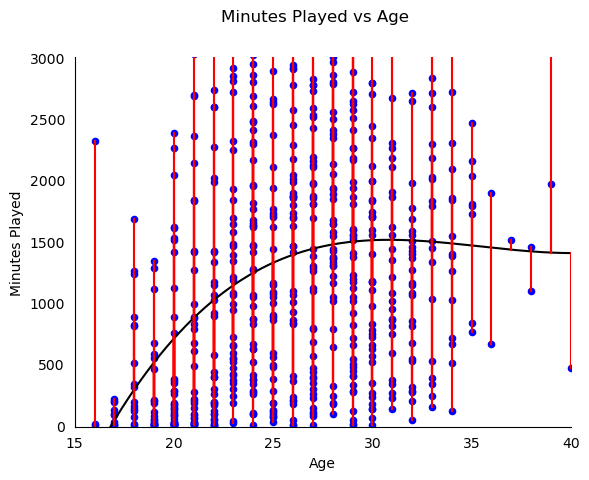

In [77]:
fig, ax = plt.subplots(1)

# Model Line
xs =  np.linspace(0,40,1000)
ys = model_all_data_fit.predict({"Age" : xs, "Age_squared": xs ** 2, "Age_cubed" : xs ** 3})

# Drawing from points to model line
predictions_to_minutes = pd.DataFrame()
predictions_to_minutes["Min"] = minutes_model_all_data["Min"]
predictions_to_minutes["Age"] = minutes_model_all_data["Age"]
predictions_to_minutes["Age_squared"] = minutes_model_all_data["Age_squared"] 
predictions_to_minutes["Age_cubed"] = minutes_model_all_data["Age_cubed"] 
predictions_to_minutes["Prediction"] = model_all_data_fit.predict({"Age" : minutes_model_all_data["Age"], "Age_squared" : minutes_model_all_data["Age_squared"], "Age_cubed" : minutes_model_all_data["Age_cubed"]})
minutes_model_all_data.plot.scatter(x="Age", y="Min", color="Blue", ax=ax)

ax.set_ylabel("Minutes Played")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.plot(xs, ys, c="black")

plt.tick_params(bottom=False, left=False)
plt.xlim(15, 40)
plt.ylim(-10,3000)

for i,a in enumerate(predictions_to_minutes['Age']):
     ax.plot([a,a], [predictions_to_minutes['Min'][i], predictions_to_minutes["Prediction"][i]], color='red')

fig.suptitle("Minutes Played vs Age")
plt.show();

#### Model Limitations
- Only modelling minutes played based on one factor -> age. Whilst you can draw a decent rule of thumb of player getting more minutes as they gain more experience, before hitting a peak in their mid-to-late twenties before falling away a bit when they hit their thirties; this model does not take into account other factors which could influence minutes played such as position, number of injuries etc.
    - Only using factors/variables based on age is why we have a high conidtion number, as the `age squared` and `age cubed` values can obviously be easily calcualted from `age` so there is an issue with collinearity between the variables. 

- Thoe model improves, only slightly, when a cubic term is applied, and there is no noteable difference between the $R^2$ and adjusted $R^2$ values:

| Model | $R^2$ | Adjusted $R^2$ |
|:-----:|:-----:|:-------------:|
|Squared Term | 0.143 | 0.141   |
|Cubic Term | 0.146 | 0.142     |